# Three Body Problem 
This notebook simulates and animates the Three Body Problem $^©$. For this notebook, we are considering the coplanar case where all of the bodies lie within the x-y plane. Additionally, the only force acting on the bodies is the gravitational force between them.

Each of the three bodies is defined with their own mass, x and y position, and velocity in the x and y directions. The force between the vodies is the gravitational force. 


<div>
<img src="media/images/5300Final/three_body.jpeg" width="500"/>
</div>


## Euler-Lagrange Equation

For the three-body problem, we use the generalized coordinates of: 

$q = (x_1, y_1, x_2, y_2, x_3, y_3)$

### Kinetic Energy, T

The Kinetic Energy of the system, T, is simply given by the sum of the kinetic energies of each body:

$T = \frac{1}{2} * m_1 * v_1^2 + \frac{1}{2} * m_2 * v_2^2 + \frac{1}{2} * m_3 * v_3^2$

where $v_i^2 = x_i^2 + y_i^2$ for each body $i$.


### Potential Energy, U

The potential energy of the system is given by the gravitational force between each of the bodies. For any given body $i$ and $j$, the gravitational potential energy is given by:

$U_{ij} = -G\frac{m_i m_j}{r}$

Where G is the gravitational constant. With this in mind, we can write the potential energy of the system as the sum of these potential energies.


$U = -G \left( \frac{m_1 m_2}{r_{12}} + \frac{m_1 m_3}{r_{13}} + \frac{m_2 m_3}{r_{23}} \right)$

where $r_{ij}$ is the distance between bodies $i$ and $j$, given by:


$r_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}$

### Lagrangian, L

With these two values, we can calculate the lagrangian as the difference of $T$ and $U$:


$ L = T - V = \frac{1}{2} m_1 (\dot{x}_1^2 + \dot{y}_1^2) + \frac{1}{2} m_2 (\dot{x}_2^2 + \dot{y}_2^2) + \frac{1}{2} m_3 (\dot{x}_3^2 + \dot{y}_3^2) - G \left( \frac{m_1 m_2}{r_{12}} + \frac{m_1 m_3}{r_{13}} + \frac{m_2 m_3}{r_{23}} \right)$


### Euler-Lagrange Equations

The Euler-Lagrange equations are given by:




$\begin{align}
\frac{d}{dt}\frac{\partial L}{\partial \dot{x}_i} = \frac{\partial L}{\partial x_i} 
\quad\Longrightarrow\quad 
\ddot{x}_i = -G \left( \frac{m_j (x_i - x_j)}{r_{ij}^3} + \frac{m_k (x_i - x_k)}{r_{ik}^3} \right) \\
\\
\frac{d}{dt}\frac{\partial L}{\partial \dot{y}_i} = \frac{\partial L}{\partial y_i}
\quad\Longrightarrow\quad 
\ddot{y}_i = -G \left( \frac{m_j (y_i - y_j)}{r_{ij}^3} + \frac{m_k (y_i - y_k)}{r_{ik}^3} \right)
\end{align}$


In [1]:
# Imports :)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
class ThreeBodyProblem:
    """
    Three Body class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    m1 : float
        mass of object 1
    m2 : float
        mass of object 2
    m3 : float, optional
        mass of object 3
    G : float
        Gravitational constant

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    solve_ode(y0, t_pts)
        Solve the ODE using the solve_ivp function
    """
    
    
    def __init__(self, m1, m2, m3, G=1):
        """Initialize with masses and g :)"""
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
        
        
    def dy_dt(self, t, y):
        """
        Function to simulate the two body problem.
        :param y: state vector
        :return: derivative of state vector
        """
        x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = y
        r_12 = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        r_23 = np.sqrt((x2 - x3) ** 2 + (y2 - y3) ** 2)
        r_31 = np.sqrt((x3 - x1) ** 2 + (y3 - y1) ** 2)
        
        
        
        
        dvx1 = (self.G * self.m2 * (x2 - x1) / r_12**3 +
                self.G * self.m3 * (x3 - x1) / r_31**3)
        
        dvy1 = (self.G * self.m2 * (y2 - y1) / r_12**3 +
                self.G * self.m3 * (y3 - y1) / r_31**3)
        
        dvx2 = (self.G * self.m1 * (x1 - x2) / r_12**3 +
                self.G * self.m3 * (x3 - x2) / r_23**3)
        
        dvy2 = (self.G * self.m1 * (y1 - y2) / r_12**3 +
                self.G * self.m3 * (y3 - y2) / r_23**3)
        
        dvx3 = (self.G * self.m1 * (x1 - x3) / r_31**3 +
                self.G * self.m2 * (x2 - x3) / r_23**3)
        
        dvy3 = (self.G * self.m1 * (y1 - y3) / r_31**3 +
                self.G * self.m2 * (y2 - y3) / r_23**3)
        
        
        return np.array([vx1, vy1, vx2, vy2, vx3, vy3,
                         dvx1, dvy1, dvx2, dvy2, dvx3, dvy3])
        
    def solve_ode(self, y0, t_pts):
        """
        Solve the ODE using the Euler method.
        :param y0: initial state vector
        :param t_pts: time points to evaluate the solution
        :return: list of values
        """
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y0, t_eval=t_pts)
        return solution.y


In [3]:
def get_positions(r1, r2, r3, m1, m2, m3,
                    v1, v2, v3, G=1, t_pts=np.linspace(0, 10, 100)):
    """Get the positions of the three bodies given initial stuff."""
    y0 = np.array([r1[0], r1[1], r2[0], r2[1], r3[0], r3[1],
                     v1[0], v1[1], v2[0], v2[1], v3[0], v3[1]])
    problem = ThreeBodyProblem(m1, m2, m3, G)
    positions = problem.solve_ode(y0, t_pts)
    return positions[:6, :]

Available plot styles:
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


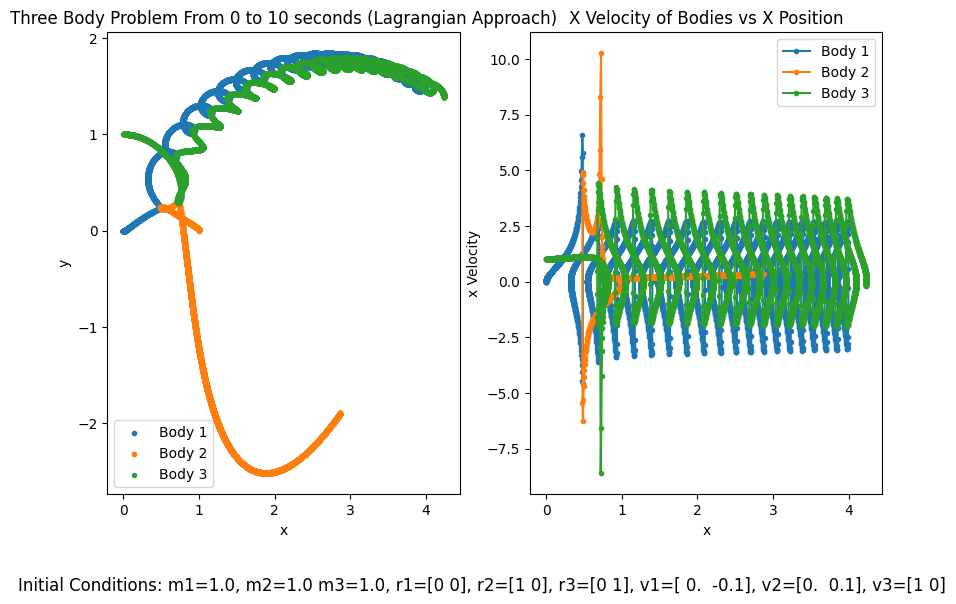

In [4]:
## Example usage
G = 1.0  # Gravitational constant

m1 = 1.0
m2 = 1.0
m3 = 1.0
r1 = np.array([0, 0])
r2 = np.array([1, 0])
r3 = np.array([0, 1])
v1 = np.array([0, -0.1])
v2 = np.array([0, 0.1])
v3 = np.array([1, 0])
y0 = np.array([r1[0], r1[1], r2[0], r2[1], r3[0], r3[1],
               v1[0], v1[1], v2[0], v2[1], v3[0], v3[1]])
t0 = 0
t1 = 10
dt = 0.001
t_pts = np.arange(t0, t1, dt)
problem = ThreeBodyProblem(m1, m2, m3)
values = problem.solve_ode(y0, t_pts)

values = np.array(values)
x1_values = values[0, :]
y1_values = values[1, :]
x2_values = values[2, :]
y2_values = values[3, :]
x3_values = values[4, :]
y3_values = values[5, :]
vx1_values = values[6, :]
vy1_values = values[7, :]
vx2_values = values[8, :]
vy2_values = values[9, :]
vx3_values = values[10, :]
vy3_values = values[11, :]
# Plot the results
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)

plt.scatter(x1_values, y1_values, label='Body 1', marker='.')
plt.scatter(x2_values, y2_values, label='Body 2', marker='.')
plt.scatter(x3_values, y3_values, label='Body 3', marker='.')
#plt.style.use('fivethirtyeight')

# print the plot styles available
print("Available plot styles:")
print(plt.style.available)


plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Three Body Problem From {t0} to {t1} seconds (Lagrangian Approach)')
# add a caption with initial conditions
plt.figtext(0.5, -0.05, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x1_values, vx1_values, label='Body 1', marker='.')
plt.plot(x2_values, vx2_values, label='Body 2', marker='.')
plt.plot(x3_values, vx3_values, label='Body 3', marker='.')
plt.xlabel('x')
plt.ylabel('x Velocity')
plt.title('X Velocity of Bodies vs X Position')
plt.legend()



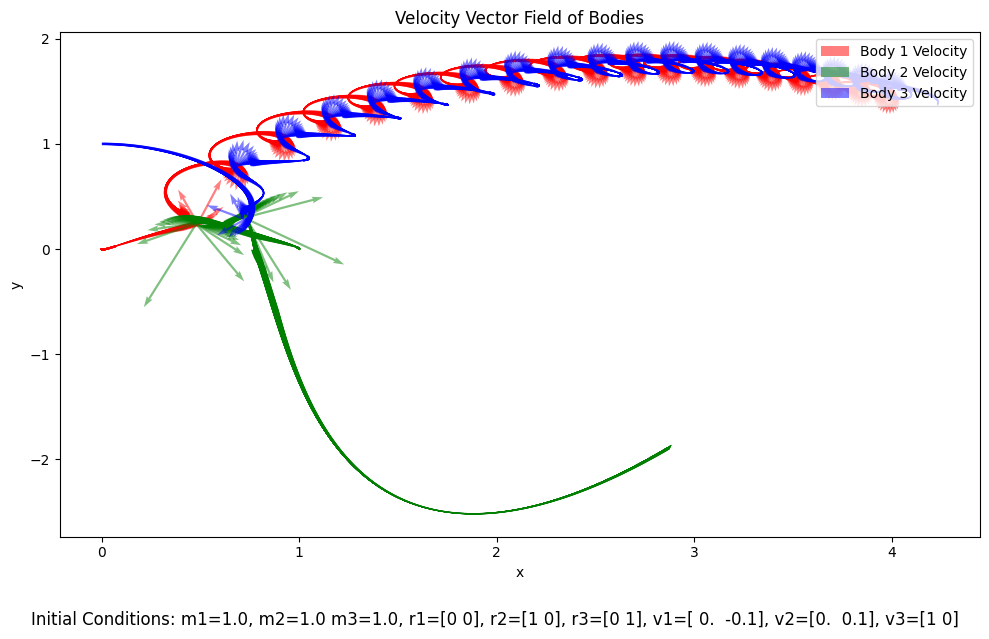

In [5]:
# Making Quiver / Vector Field Plots
plt.figure(figsize=(10, 6))
plt.quiver(x1_values, y1_values, vx1_values, vy1_values, 
           color='r', label='Body 1 Velocity', alpha=0.5)
plt.quiver(x2_values, y2_values, vx2_values, vy2_values,
              color='g', label='Body 2 Velocity', alpha=0.5)
plt.quiver(x3_values, y3_values, vx3_values, vy3_values,
                color='b', label='Body 3 Velocity', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Velocity Vector Field of Bodies')
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.05, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

## Hamiltonian Approach

In contrast to the Lagrangian approach, the Hamiltonian uses a generalized position and a generalized momentum. We can derive the Hamiltonian equations of motion from the Lagrangian defined above.

The generalized momentum, $p_i$, is defined as:

$p_i = \frac{\partial L}{\partial \dot{q}_i} = m_i \dot{q}_i$

where $\dot{q}_i$ is the generalized velocity. This result is the expected classical momentum of a particle.

The Hamiltonian, $H$, is then defined as:

$H = \sum_i p_i \dot{q}_i - L$


Substituting the above Lagrangian into this equation, we get:

$H = \sum_i m_i \dot{q}_i^2 - \left( \frac{1}{2} m_1 (\dot{x}_1^2 + \dot{y}_1^2) + \frac{1}{2} m_2 (\dot{x}_2^2 + \dot{y}_2^2) + \frac{1}{2} m_3 (\dot{x}_3^2 + \dot{y}_3^2) - G \left( \frac{m_1 m_2}{r_{12}} + \frac{m_1 m_3}{r_{13}} + \frac{m_2 m_3}{r_{23}} \right) \right)$

and then

$H = = \frac{p_{x_1}^2 + p_{y_1}^2}{2 m_1} + \frac{p_{x_2}^2 + p_{y_2}^2}{2 m_2} + \frac{p_{x_3}^2 + p_{y_3}^2}{2 m_3} + G \left( \frac{m_1 m_2}{r_{12}} + \frac{m_1 m_3}{r_{13}} + \frac{m_2 m_3}{r_{23}} \right)$

Which is also just the total energy of the system. 

The Hamiltonian equations of motion are then given by:

$\begin{align}
\dot{q}_i = \frac{\partial H}{\partial p_i} \\
\dot{p}_i = -\frac{\partial H}{\partial q_i}
\end{align}$


Plugging everything above into those equations, we get the equations to be used in our code:

$\begin{align}
\dot{x}_i = \frac{p_{x_i}}{m_i} \\
\dot{y}_i = \frac{p_{y_i}}{m_i} \\
\dot{p}_{x_i} = -G \left( \frac{m_j (x_i - x_j)}{r_{ij}^3} + \frac{m_k (x_i - x_k)}{r_{ik}^3} \right) \\
\dot{p}_{y_i} = -G \left( \frac{m_j (y_i - y_j)}{r_{ij}^3} + \frac{m_k (y_i - y_k)}{r_{ik}^3} \right)
\end{align}$

As expected, the derivative of the position is the momentum over mass, and the change in momentum is just the force.


In [6]:
class ThreeBodyProblemHamiltonian:
    """
    Three Body Hamiltonian class implements the parameters and
    hamiltonian equations of motion for three bodies.
     
    Parameters
    ----------
    m1 : float
        mass of object 1
    m2 : float
        mass of object 2
    m3 : float, optional
        mass of object 3
    G : float
        Gravitational constant

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    solve_ode(y0, t_pts)
        Solve the ODE using the solve_ivp function
    """
    
    
    def __init__(self, m1, m2, m3, G=1):
        """Initialize with masses and g :)"""
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.G = G
        
        
    def dy_dt(self, t, y):
        """
        Function to simulate the two body problem.
        :param y: state vector
        :return: derivative of state vector
        """
        
        # Format:
        # y = [x1, y1, x2, y2, x3, y3, px1, py1, px2, py2, px3, py3]
        
        x1, y1, x2, y2, x3, y3, px1, py1, px2, py2, px3, py3 = y
        r_12 = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
        r_23 = np.sqrt((x2 - x3) ** 2 + (y2 - y3) ** 2)
        r_31 = np.sqrt((x3 - x1) ** 2 + (y3 - y1) ** 2)
        
        # Derivatives of position are the momenta divided by the mass
        
        # Derivatives of momentum are the forces divided by the mass
        
        dx1 = px1 / self.m1
        dy1 = py1 / self.m1
        dx2 = px2 / self.m2
        dy2 = py2 / self.m2
        dx3 = px3 / self.m3
        dy3 = py3 / self.m3
        dp_x1 = (self.G * self.m2 * (x2 - x1) / r_12**3 +
                 self.G * self.m3 * (x3 - x1) / r_31**3)
        dp_y1 = (self.G * self.m2 * (y2 - y1) / r_12**3 +
                    self.G * self.m3 * (y3 - y1) / r_31**3)
        dp_x2 = (self.G * self.m1 * (x1 - x2) / r_12**3 +
                    self.G * self.m3 * (x3 - x2) / r_23**3)
        dp_y2 = (self.G * self.m1 * (y1 - y2) / r_12**3 +
                    self.G * self.m3 * (y3 - y2) / r_23**3)
        dp_x3 = (self.G * self.m1 * (x1 - x3) / r_31**3 +
                    self.G * self.m2 * (x2 - x3) / r_23**3)
        dp_y3 = (self.G * self.m1 * (y1 - y3) / r_31**3 +
                    self.G * self.m2 * (y2 - y3) / r_23**3)
                
        return np.array([dx1, dy1, dx2, dy2, dx3, dy3,
                        dp_x1, dp_y1, dp_x2, dp_y2, dp_x3, dp_y3])
        
    def solve_ode(self, y0, t_pts):
        """
        Solve the ODE using the Euler method.
        :param y0: initial state vector
        :param t_pts: time points to evaluate the solution
        :return: list of values
        """
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y0, t_eval=t_pts)
        return solution.y


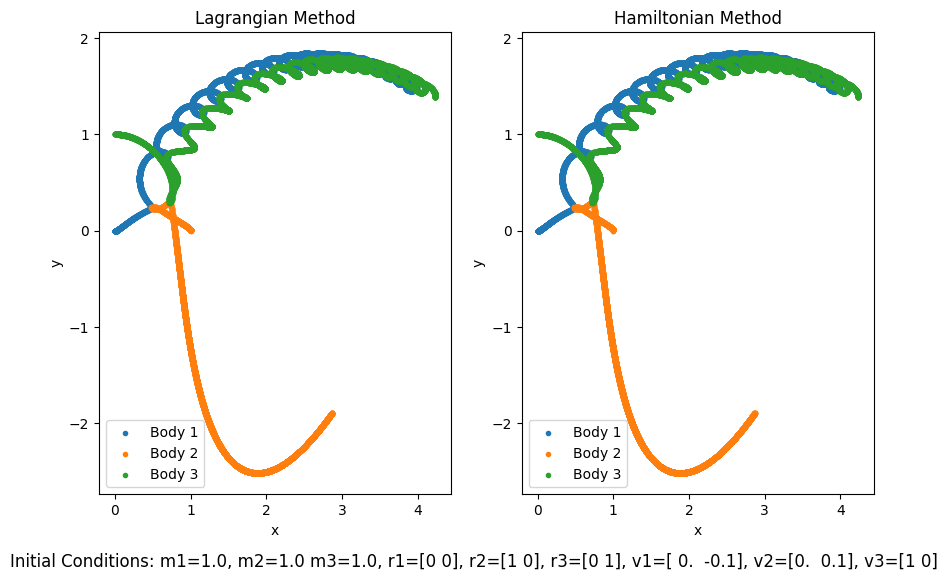

In [7]:
# Example usage of Hamiltonian formulation
p01 = m1 * v1
p02 = m2 * v2
p03 = m3 * v3

y0_hamiltonian = np.array([r1[0], r1[1], r2[0], r2[1], r3[0], r3[1],
                            p01[0], p01[1], p02[0], p02[1], p03[0], p03[1]])
t0 = 0
t1 = 10
dt = 0.001
t_pts = np.arange(t0, t1, dt)

hamiltonian = ThreeBodyProblemHamiltonian(m1, m2, m3)
position_vals = hamiltonian.solve_ode(y0_hamiltonian, t_pts)
position_vals = np.array(position_vals)

x1_values_hamiltonian = position_vals[0, :]
y1_values_hamiltonian = position_vals[1, :]
x2_values_hamiltonian = position_vals[2, :]
y2_values_hamiltonian = position_vals[3, :]
x3_values_hamiltonian = position_vals[4, :]
y3_values_hamiltonian = position_vals[5, :]
p1x_values_hamiltonian = position_vals[6, :]
p1y_values_hamiltonian = position_vals[7, :]
p2x_values_hamiltonian = position_vals[8, :]
p2y_values_hamiltonian = position_vals[9, :]
p3x_values_hamiltonian = position_vals[10, :]
p3y_values_hamiltonian = position_vals[11, :]


plt.figure(figsize=(10, 6))

# make a 2x1 grid

# Lagrangian Method

plt.subplot(1, 2, 1)

plt.scatter(x1_values, y1_values, label='Body 1', marker='.')
plt.scatter(x2_values, y2_values, label='Body 2', marker='.')
plt.scatter(x3_values, y3_values, label='Body 3', marker='.')
plt.title('Lagrangian Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# Hamiltonian Method
#plt.tight_layout()



plt.subplot(1, 2, 2)

plt.scatter(x1_values_hamiltonian, y1_values_hamiltonian, label='Body 1', marker='.')
plt.scatter(x2_values_hamiltonian, y2_values_hamiltonian, label='Body 2', marker='.')
plt.scatter(x3_values_hamiltonian, y3_values_hamiltonian, label='Body 3', marker='.')


# print the plot styles available


plt.xlabel('x')
plt.ylabel('y')
plt.title('Hamiltonian Method')
# add a caption with initial conditions
plt.figtext(0.5, -0.01, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()

## Conserved Quantities

Naturally, we should expect some quantities of the system to be conserved over time, namely energy and momentum. However, numerical integration methods can produce small errors in these quantities from one time step to another. So, this section will look at how well these quantities are conserved over time, comparing the Lagrangian and Hamiltonian approaches.

Total energy of the system: -2.1971067811865472


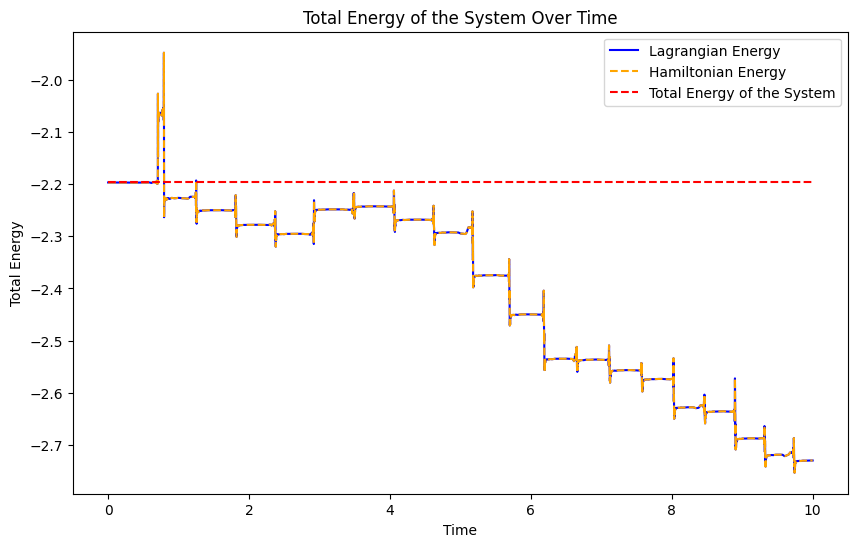

In [8]:
system_total_energy = (0.5 * (p01[0]**2 + p01[1]**2) / m1 +
                            0.5 * (p02[0]**2 + p02[1]**2) / m2 +
                            0.5 * (p03[0]**2 + p03[1]**2) / m3 -
                            G * m1 * m2 / (np.sqrt((r1[0] - r2[0])**2 + (r1[1] - r2[1])**2)) -
                            G * m1 * m3 / (np.sqrt((r1[0] - r3[0])**2 + (r1[1] - r3[1])**2)) -
                            G * m2 * m3 / (np.sqrt((r2[0] - r3[0])**2 + (r2[1] - r3[1])**2)))
                            
print(f'Total energy of the system: {system_total_energy}')

# Now we can calculate the total energy of the lagrangian and hamiltonian systems at each time step,
# plotting how they evolve over time

def calculate_energy_lagrangian(y):
    """return an array of the energy"""
    energy = []
    for i in range(y.shape[1]):
        x1, y1, x2, y2, x3, y3, vx1, vy1, vx2, vy2, vx3, vy3 = y[:, i]
        kinetic_energy = (0.5 * m1 * (vx1**2 + vy1**2) +
                          0.5 * m2 * (vx2**2 + vy2**2) +
                          0.5 * m3 * (vx3**2 + vy3**2))
        potential_energy = (-G * m1 * m2 / np.sqrt((x1 - x2)**2 + (y1 - y2)**2) -
                            G * m1 * m3 / np.sqrt((x1 - x3)**2 + (y1 - y3)**2) -
                            G * m2 * m3 / np.sqrt((x2 - x3)**2 + (y2 - y3)**2))
        energy.append(kinetic_energy + potential_energy)
    return np.array(energy)

def calculate_energy_hamiltonian(y):
    """return an array of the energy using the hamiltonian momentum instead"""
    energy = []
    for i in range(y.shape[1]):
        x1, y1, x2, y2, x3, y3, px1, py1, px2, py2, px3, py3 = y[:, i]
        kinetic_energy = (px1**2 + py1**2) / (2 * m1) + \
                         (px2**2 + py2**2) / (2 * m2) + \
                         (px3**2 + py3**2) / (2 * m3) 
        potential_energy = (-G * m1 * m2 / np.sqrt((x1 - x2)**2 + (y1 - y2)**2) -
                            G * m1 * m3 / np.sqrt((x1 - x3)**2 + (y1 - y3)**2) -
                            G * m2 * m3 / np.sqrt((x2 - x3)**2 + (y2 - y3)**2))
        energy.append(kinetic_energy + potential_energy)
    return np.array(energy)

# Calculate energies
energy_lagrangian = calculate_energy_lagrangian(values)
energy_hamiltonian = calculate_energy_hamiltonian(position_vals)

plt.figure(figsize=(10, 6))
plt.plot(t_pts, energy_lagrangian, label='Lagrangian Energy', color='blue')
plt.plot(t_pts, energy_hamiltonian, label='Hamiltonian Energy', color='orange', linestyle='--')
plt.hlines(y=system_total_energy, color='red', linestyle='--', 
           label='Total Energy of the System', linewidth=1.5, xmin=t_pts[0], xmax=t_pts[-1])
plt.title('Total Energy of the System Over Time')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.legend()
    
                            


Total x momentum of the system: 1.0
Total y momentum of the system: 0.0


Text(0.5, -0.05, 'Initial Conditions: m1=1.0, m2=1.0 m3=1.0, r1=[0 0], r2=[1 0], r3=[0 1], v1=[ 0.  -0.1], v2=[0.  0.1], v3=[1 0]')

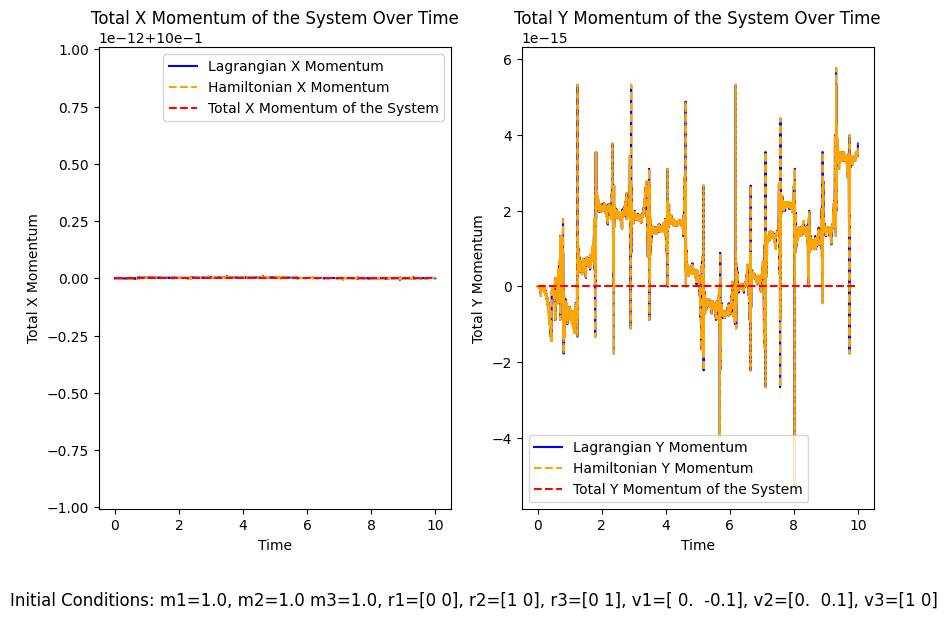

In [9]:
total_x_momentum = (m1 * v1[0] + m2 * v2[0] + m3 * v3[0])
total_y_momentum = (m1 * v1[1] + m2 * v2[1] + m3 * v3[1])
print(f'Total x momentum of the system: {total_x_momentum}')
print(f'Total y momentum of the system: {total_y_momentum}')

def calculate_momentum_lagrangian(y):
    """return an array of the momentum"""
    momentum_x = []
    momentum_y = []
    for i in range(y.shape[1]):
        vx1, vy1, vx2, vy2, vx3, vy3 = y[6:, i]
        momentum_x.append(m1 * vx1 + m2 * vx2 + m3 * vx3)
        momentum_y.append(m1 * vy1 + m2 * vy2 + m3 * vy3)
    return np.array(momentum_x), np.array(momentum_y)

momentum_hamiltonian_x = (p1x_values_hamiltonian + p2x_values_hamiltonian + p3x_values_hamiltonian)
momentum_hamiltonian_y = (p1y_values_hamiltonian + p2y_values_hamiltonian + p3y_values_hamiltonian)


momentum_lagrangian_x, momentum_lagrangian_y = calculate_momentum_lagrangian(values)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)

plt.plot(t_pts, momentum_lagrangian_x, label='Lagrangian X Momentum', color='blue')
plt.plot(t_pts, momentum_hamiltonian_x, label='Hamiltonian X Momentum', color='orange', linestyle='--')
plt.hlines(y=total_x_momentum, color='red', linestyle='--', 
           label='Total X Momentum of the System', linewidth=1.5, xmin=t_pts[0], xmax=t_pts[-1])
plt.title('Total X Momentum of the System Over Time')
plt.xlabel('Time')
plt.ylabel('Total X Momentum')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t_pts, momentum_lagrangian_y, label='Lagrangian Y Momentum', color='blue')
plt.plot(t_pts, momentum_hamiltonian_y, label='Hamiltonian Y Momentum', color='orange', linestyle='--')
plt.hlines(y=total_y_momentum, color='red', linestyle='--', 
           label='Total Y Momentum of the System', linewidth=1.5, xmin=t_pts[0], xmax=t_pts[-1])
plt.title('Total Y Momentum of the System Over Time')
plt.xlabel('Time')
plt.ylabel('Total Y Momentum')
plt.legend()

plt.figtext(0.5, -0.05, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)

## Hamiltonian vs Lagrangian

For the three body problem, the Hamiltonian and Lagrangian approaches yield the same results for conserving different quantitites as it is a simple system. However, the Hamiltonian might be better at conserving energy over time in other systems as it is based on the total energy of the system, while the Lagrangian approach is based on a difference between the kinetic and potential energies.

Here, though, the generalized momentum is simply a scalar value times the generalized velocity, which leads to the same integrations over time


## Manim Animations

In [10]:
from manim import *
config.media_width = "100%"

Text(0.5, -0.01, 'Initial Conditions: m1=1.0, m2=1.0 m3=1.0, r1=[0. 0.], r2=[0.  1.1], r3=[ 0. -1.], v1=[0. 0.], v2=[0.2 0. ], v3=[-0.2  0. ]')

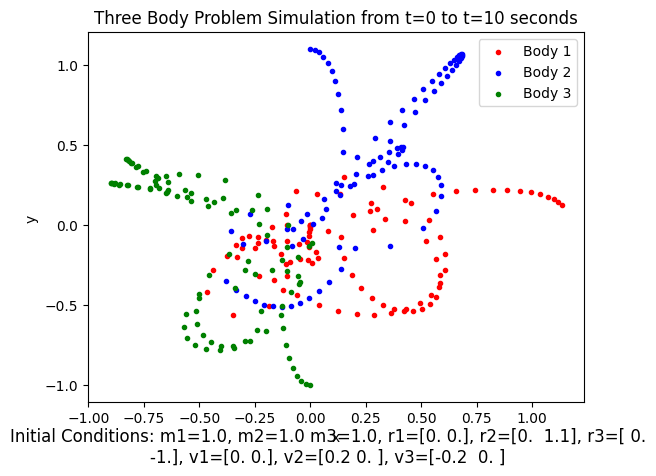

In [11]:

t_pts = np.linspace(0., 10., 100)

m1 = 1.0
m2 = 1.0
m3 = 1.0

r1 = np.array([0.0, 0.0])
r2 = np.array([0.0, 1.1])
r3 = np.array([0.0, -1.0])

v1 = np.array([0.0, 0.0])
v2 = np.array([0.2, 0.0])
v3 = np.array([-0.2, 0.0])


positions = get_positions(r1, r2, r3, m1, m2, m3, v1, v2, v3, t_pts=t_pts)

x_1 = positions[0, :]
y_1 = positions[1, :]
x_2 = positions[2, :]
y_2 = positions[3, :]
x_3 = positions[4, :]
y_3 = positions[5, :]

plt.scatter(x_1, y_1, label='Body 1', marker='.', color='red')
plt.scatter(x_2, y_2, label='Body 2', marker='.', color='blue')
plt.scatter(x_3, y_3, label='Body 3', marker='.', color='green')
plt.title('Three Body Problem Simulation from t=0 to t=10 seconds')
plt.xlabel('x')
plt.ylabel('y ')
plt.legend()
plt.figtext(0.5, -0.01, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)


In [12]:
class ThreeBodyScene(Scene):
    def construct(self):
        title = Text("Three Body Problem Simulation", font_size=36).to_edge(UP)
        self.add(title)
        # Constructing the scene for the simulation
        dot1 = Dot(color=RED)
        dot2 = Dot(color=BLUE)
        dot3 = Dot(color=GREEN)
        # I'm setting the z values to 0 because we assume coplanar
        dot1.move_to([x_1[0], y_1[0], 0])
        dot2.move_to([x_2[0], y_2[0], 0])
        dot3.move_to([x_3[0], y_3[0], 0])
        self.add(dot1, dot2, dot3)
        # Add a caption with initial conditions
        caption = Text(f'Initial Conditions:\n m1={m1}, m2={m2}, m3={m3} \n' +
                          f' r1={r1}, r2={r2}, r3={r3} \n v1={v1}, v2={v2}, v3={v3}',
                       font_size=24).next_to(dot3, DOWN)
        self.add(caption)
    
        for i in range(1, len(x_1)):
            # playing the animation over time
            self.play(dot1.animate.move_to([x_1[i], y_1[i], 0]),
                    dot2.animate.move_to([x_2[i], y_2[i], 0]),
                    dot3.animate.move_to([x_3[i], y_3[i], 0]),
                    run_time=0.05, rate_func=linear)

        
        

In [13]:
%manim -qm -v WARNING ThreeBodyScene    

Manim Community v0.19.0

## Interactivity

This section uses the ipywidgets library to create an interactive three body simulation. As the user changes the input parameters of the simulation, it will automatically update and plot the results.

In [14]:

# Import the widgets we will use (add more if needed!) 
import ipywidgets as widgets
from ipywidgets import HBox, VBox, Layout, Tab, Label, Checkbox
from ipywidgets import FloatSlider, IntSlider, Play, Dropdown, HTMLMath 

from IPython.display import display
from time import sleep

In [41]:
# Widgets for the three body parameters (all use FloatSlider, so we made 
#  it a function)
def float_widget(value, min, max, step, description, format):
    """Makes a FloatSlider with the passed parameters and continuous_update
       set to False."""
    slider_border = Layout(border='solid 1.0px')
    return FloatSlider(value=value,min=min,max=max,step=step,disabled=False,
                       description=description,continuous_update=False,
                       orientation='horizontal',layout=slider_border,
                       readout=True,readout_format=format)
    
    
def three_body_plots(x1, y1, x2, y2, x3, y3, m1, m2, m3, v1x, v1y, v2x, v2y, v3x, v3y, t_pts):
   """Plot the three body plot for the interactive output"""
   # get the points
   v1 = np.array([v1x, v1y])
   v2 = np.array([v2x, v2y])
   v3 = np.array([v3x, v3y])
   r1 = np.array([x1, y1])
   r2 = np.array([x2, y2])
   r3 = np.array([x3, y3])
   positions = get_positions(r1=r1, r2=r2, r3=r3, m1=m1, m2=m2, m3=m3,
                            v1=v1, v2=v2, v3=v3, t_pts=t_pts)
   x1_values = positions[0, :]
   y1_values = positions[1, :]
   x2_values = positions[2, :]
   y2_values = positions[3, :]
   x3_values = positions[4, :]
   y3_values = positions[5, :]
   
   
   # clear the plot
   plt.clf()
   plt.cla()
   plt.close()
   
   
   # Plot the results
   fig = plt.figure(figsize=(10, 6))
   plt.scatter(x1_values, y1_values, label='Body 1', marker='.')
   plt.scatter(x2_values, y2_values, label='Body 2', marker='.')
   plt.scatter(x3_values, y3_values, label='Body 3', marker='.')
   plt.xlabel('x')
   plt.ylabel('y')
   plt.title('Three Body Problem Simulation')
   plt.legend()
   plt.figtext(0.5, -0.05, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
               f'r1=({x1}, {y1}), r2=({x2}, {y2}), r3=({x3}, {y3}), ' +
               f'v1=({v1x}, {v1y}), v2=({v2x}, {v2y}), v3=({v3x}, {v3y})', 
               wrap=True, horizontalalignment='center', fontsize=12)
   plt.tight_layout()
   display(fig)
   plt.clf()
   plt.cla()
   plt.close()
   return 
   
   

In [43]:
x1 = float_widget(0.0, -10.0, 10.0, 0.1, 'x1', '.2f')
y1 = float_widget(0.0, -10.0, 10.0, 0.1, 'y1', '.2f')
x2 = float_widget(1.0, -10.0, 10.0, 0.1, 'x2', '.2f')
y2 = float_widget(0.0, -10.0, 10.0, 0.1, 'y2', '.2f')
x3 = float_widget(0.0, -10.0, 10.0, 0.1, 'x3', '.2f')
y3 = float_widget(1.0, -10.0, 10.0, 0.1, 'y3', '.2f')
m1 = float_widget(1.0, 0.01, 10.0, 0.01, 'm1', '.2f')
m2 = float_widget(1.0, 0.01, 10.0, 0.01, 'm2', '.2f')
m3 = float_widget(1.0, 0.01, 10.0, 0.01, 'm3', '.2f')
v1x = float_widget(0.0, -5.0, 5.0, 0.01, 'v1x', '.2f')
v1y = float_widget(0.0, -5.0, 5.0, 0.01, 'v1y', '.2f')

v2x = float_widget(0.0, -5.0, 5.0, 0.01, 'v2x', '.2f')
v2y = float_widget(0.0, -5.0, 5.0, 0.01, 'v2y', '.2f')

v3x = float_widget(0.0, -5.0, 5.0, 0.01, 'v3x', '.2f')
v3y = float_widget(0.0, -5.0, 5.0, 0.01, 'v3y', '.2f')

## From Harmonic Oscillator Visualization

# Widgets for the plotting parameters
t_start = float_widget(value=0., min=0., max=10., step=1.,
                         description='t start:', format='.1f') 
t_end = float_widget(value=5., min=0., max=20., step=1.,
                       description='t end:', format='.1f')
delta_t = float_widget(value=0.001, min=0.001, max=0.1, step=0.001,
                         description='delta t:', format='.3f')
plot_start = float_widget(value=0., min=0., max=20., step=1.,
                            description='start plotting:', format='.1f')


############## Begin: Explicit callback functions #######################

# Make sure that t_end is at least t_start + 10
def update_t_end(*args):
    if t_end.value < t_start.value:
        t_end.value = t_start.value + 10     
t_end.observe(update_t_end, 'value')
t_start.observe(update_t_end, 'value')


# Make sure that plot_start is at least t_start and less than t_end
def update_plot_start(*args):
    if plot_start.value < t_start.value:
        plot_start.value = t_start.value
    if plot_start.value > t_end.value:
        plot_start.value = t_end.value
plot_start.observe(update_plot_start, 'value')
t_start.observe(update_plot_start, 'value')
t_end.observe(update_plot_start, 'value')

def three_body_plots_wrapper(x1, y1, x2, y2, x3, y3,
                              m1, m2, m3,
                              v1x, v1y, v2x, v2y, v3x, v3y,
                              t_start, t_end, delta_t):

    t_pts = np.arange(t_start, t_end, delta_t)
    three_body_plots(x1, y1, x2, y2, x3, y3,
                            m1, m2, m3,
                            v1x, v1y, v2x, v2y, v3x, v3y,
                            t_pts)
    return

plot_out = widgets.interactive_output(three_body_plots_wrapper, {
    'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2, 'x3': x3, 'y3': y3,
    'm1': m1, 'm2': m2, 'm3': m3,
    'v1x': v1x, 'v1y': v1y,
    'v2x': v2x, 'v2y': v2y,
    'v3x': v3x, 'v3y': v3y,
    't_start': t_start, 't_end': t_end, 'delta_t': delta_t
})

vbox1 = VBox([x1, y1, x2, y2, x3, y3])

vbox2 = VBox([m1, m2, m3, v1x, v1y, v2x, v2y, v3x, v3y])

vbox3 = VBox([t_start, t_end, delta_t, plot_start])

# Create the tab for the widgets
tab = Tab(children=[vbox1, vbox2, vbox3])
tab.set_title(0, 'Positions')
tab.set_title(1, 'Masses & Velocities')
tab.set_title(2, 'Time Parameters')

# Displaying the widgets
display(tab)
display(plot_out)



Output()

I do not know why there are two plots, but when I've gotten it to only show one it doesn't update corrrectly. Also, the titles aren't showing on the boxes for some reason :(

## Stable Orbits

Found a cool figure 8 orbit from the website: https://webhomes.maths.ed.ac.uk/~ateckent/vacation_reports/Report_Faustino.pdf

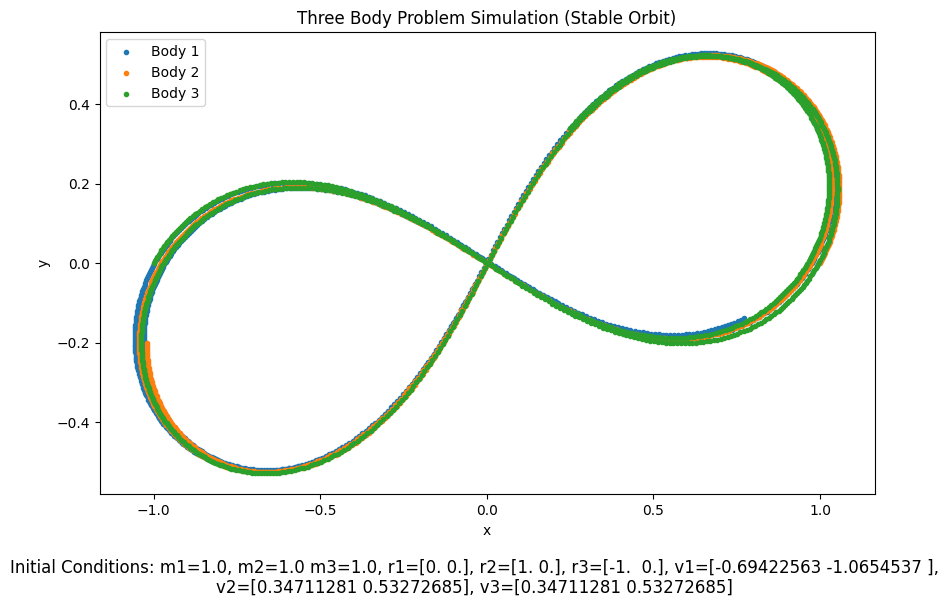

In [58]:
# Plot a stable orbit

m1, m2, m3 = 1.0, 1.0, 1.0
r1 = np.array([0.0, 0.0])
r2 = np.array([1.0, 0.0])
r3 = np.array([-1.0, 0.0])

v1 = np.array([-0.3471128135672417*2.0, -0.532726851767674*2.0])
v3 = np.array([0.3471128135672417, 0.532726851767674])

v2 = np.array([0.3471128135672417, 0.532726851767674])


# Set the time points for the simulation
t0 = 0
t1 = 10
dt = 0.01
t_pts = np.arange(t0, t1, dt)
# Get the positions of the three bodies
positions = get_positions(r1, r2, r3, m1, m2, m3, v1, v2, v3, t_pts=t_pts)

# Extract the x and y coordinates of the bodies
x_1 = positions[0, :]
y_1 = positions[1, :]
x_2 = positions[2, :]
y_2 = positions[3, :]
x_3 = positions[4, :]
y_3 = positions[5, :]
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(x_1, y_1, label='Body 1', marker='.')
plt.scatter(x_2, y_2, label='Body 2', marker='.')
plt.scatter(x_3, y_3, label='Body 3', marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Three Body Problem Simulation (Stable Orbit)')
plt.figtext(0.5, -0.05, f'Initial Conditions: m1={m1}, m2={m2} m3={m3}, ' +
            f'r1={r1}, r2={r2}, r3={r3}, v1={v1}, v2={v2}, v3={v3}', 
           wrap=True, horizontalalignment='center', fontsize=12)
plt.legend()
plt.show()


In [59]:
%manim -qm -v WARNING ThreeBodyScene    

Manim Community v0.19.0